In [12]:
import os
os.environ["OMP_NUM_THREADS"] = "3" # export OMP_NUM_THREADS=3

In [13]:
import pandas as pd


In [14]:
breast_cancer_df = pd.read_csv('breast_cancer_data.csv')


In [16]:
#Demonstrate k-means clustering using the scikit learn package 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
cols_drop = ['id', 'Unnamed: 32']
data = breast_cancer_df.drop(cols_drop, axis=1)

# Encode diagnosis label
data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})

X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)


from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state = 0, n_init=10)
km_pred = km.fit_predict(X)

In [17]:
#Calculate the sum of least square error
sse = km.inertia_
sse

11767.941709101628

In [18]:
#Determine the optimal number of clusters (k) using the elbow method along with a brief explanation
OMP_NUM_THREADS=3
from sklearn.metrics import silhouette_score

silhouette_score(X, km.labels_, metric='euclidean')


K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X, model.labels_, metric='euclidean'))



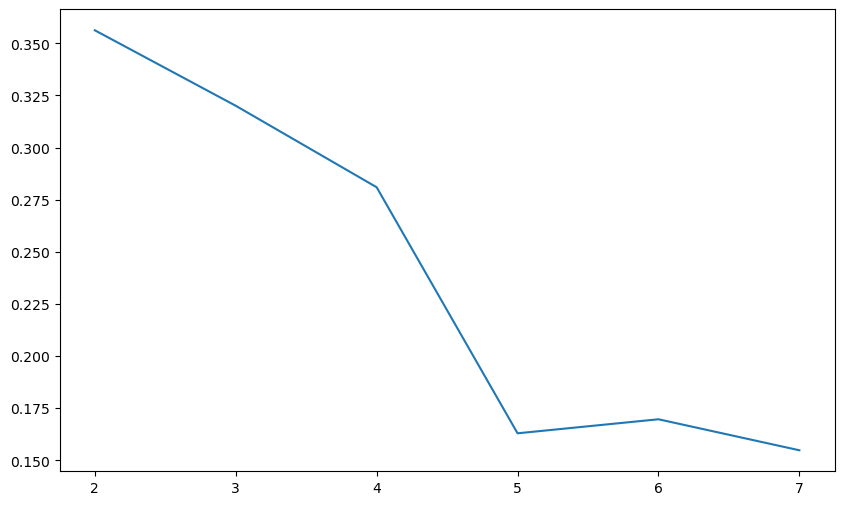

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()


Brief explanation of Elbow plot

The elbow plot shows that 5 is a good choice for the number of clusters. 

In [20]:
# Finally plot the optimal clusters

km = KMeans(n_clusters=5, random_state = 0, n_init=10)
km_pred = km.fit_predict(X)

[]

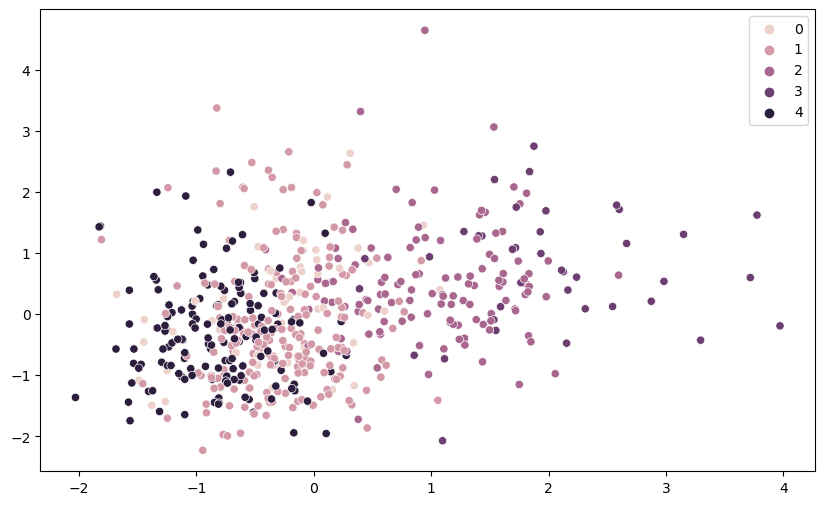

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data = X, x = X[:,0], y = X[:,1], hue = km_pred)
plt.plot()

The plot above shows the k-means with 5 clusters. Five was chosen as the number of clusters based off of the elbow method. 